# Clustering Modeling Exercises

In [2]:
import pandas as pd
from pydataset import data

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

# 1. Use the iris dataset

In [3]:
iris = data('iris')
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

### Perform clustering with sepal length, sepal width, and petal length

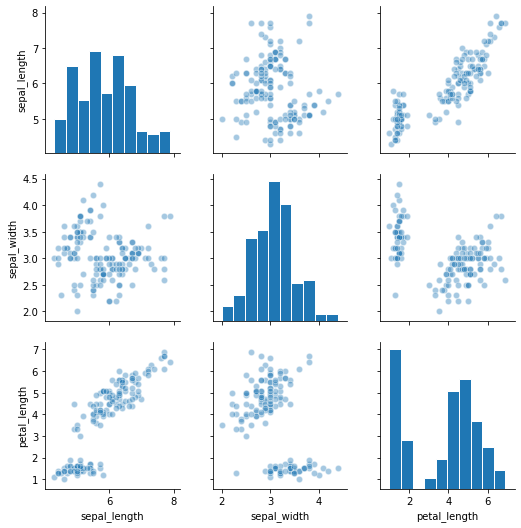

In [8]:
iris = iris[['sepal_length', 'sepal_width', 'petal_length']]

g = sns.PairGrid(iris)
g = g.map_diag(plt.hist, edgecolor = 'w')
g = g.map_offdiag(plt.scatter, edgecolor = 'w', s = 40, alpha = .4)

### Use a k of 4

- Create the instance of the k-means class, then fit it to the data
- Once we've done that, we can use the object to make predictions

In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(iris)
kmeans.predict(iris)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 1, 3, 1, 1, 0, 1, 1, 1,
       3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3], dtype=int32)

**Note:** The numbers outputted above are the groups that the K-means algorithm predicted each row to be in

- cluster_centers_: The center point of each cluster

In [11]:
kmeans.cluster_centers_

array([[5.53214286, 2.63571429, 3.96071429],
       [7.12272727, 3.11363636, 6.03181818],
       [5.006     , 3.428     , 1.462     ],
       [6.292     , 2.898     , 4.94      ]])

In [ ]:
**Note:** The numbers outputted above are the "coordinates" that the K-means algorithm calcualted as the mean each row to be in

### Create a 3d visualization that shows your clusters along with the features specified above

### Is 4 the optimal number? Try different values of k and visualize your results.

# 2. Use the mall dataset

### Perform clustering using annual income and spending score. Try out different values for k.

### Use the resulting clusters to explore your data. What is the center point for each cluster in terms of annual income and spending score? What is the average age for each cluster?


### Create a 3d plot with annual income, spending score, and age. Use color to distinguish the clusters you have created.


# 3. Load the tips dataset

### Perform k-means clustering with tip and total_bill. Try a k of 2 and a k of 3.  Visualize the resulting clusters.

### Create a 3d visualization of tip, total bill, and party size. Use color to indicate the clusters you have created.

### Use the resulting clusters to explore your dataset. What is the average party size for each cluster? How many smokers vs non smokers are in each cluster? Is this different than in the overall population?